In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
nanog_go = glob.glob("./NANOG.GO/*txt")
oct4_go = glob.glob("./OCT4.GO/*txt")

In [5]:
_go = pd.read_table("./NANOG.GO/biocyc.txt")

In [6]:
_go.head()

,TermID,Term,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
0,HUMAN_PWY-5667,CDP-diacylglycerol biosynthesis,0.017073,-4.070238,19,17,0.028716,592,907,"84803,56895,2710,129642,253558,137964,254531,8...","GPAT3,AGPAT4,GK,MBOAT2,LCLAT1,GPAT4,LPCAT4,CDS..."
1,HUMAN_PWY-6352,3-phosphoinositide biosynthesis,0.018147,-4.009235,27,23,0.038851,592,907,"5287,5288,22908,8396,138429,23396,55300,5289,5...","PIK3C2B,PIK3C2G,SACM1L,PIP4K2B,PIP5KL1,PIP5K1C..."
2,META_PWY-6352,3-phosphoinositide biosynthesis,0.032239,-3.434573,25,21,0.035473,592,907,"23396,55300,5289,8394,5291,8503,200576,5287,52...","PIP5K1C,PI4K2B,PIK3C3,PIP5K1A,PIK3CB,PIK3R3,PI..."
3,HUMAN_PWY-7209,pyrimidine ribonucleosides degradation,0.076638,-2.568660,6,6,0.010135,592,907,"51733,1807,978,1806,151531,7378","UPB1,DPYS,CDA,DPYD,UPP2,UPP1"
4,HUMAN_TRIGLSYN-PWY,triacylglycerol biosynthesis,0.083918,-2.477920,25,20,0.033784,592,907,"10554,10162,8612,8613,55326,56894,57678,51099,...","AGPAT1,LPCAT3,PLPP2,PLPP3,AGPAT5,AGPAT3,GPAM,A..."


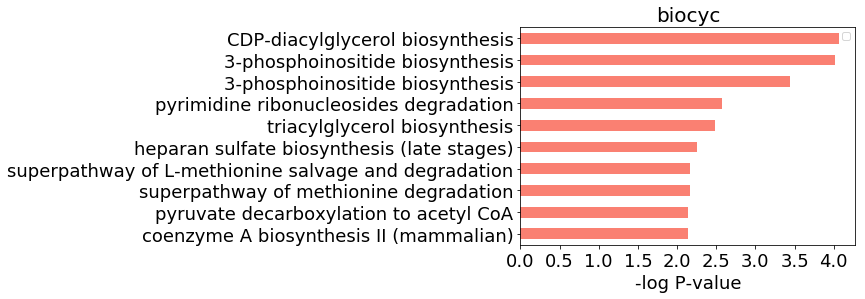

In [29]:
_go['logPnew'] = - _go.logP
_plot = _go.head(10).sort_values('logPnew',ascending=True)
bar = _plot.plot.barh(x='Term',y='logPnew', color='salmon',label="-logP", fontsize=18)
bar.set_title( "./NANOG.GO/biocyc.txt".split("/")[-1].strip(".txt"), fontsize=20)
bar.set_xlabel("-log P-value", fontsize=18)
bar.set_ylabel("")
bar.legend("")
bar.figure.savefig()

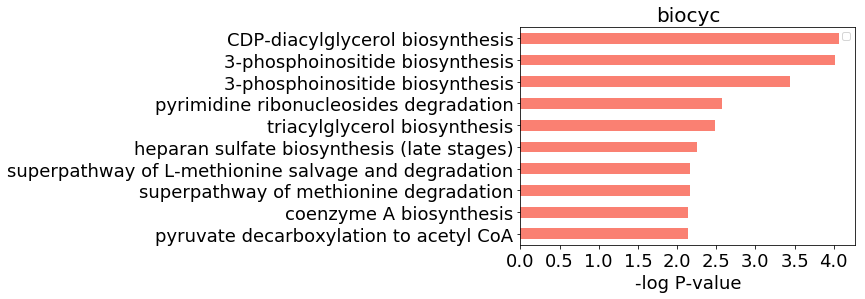

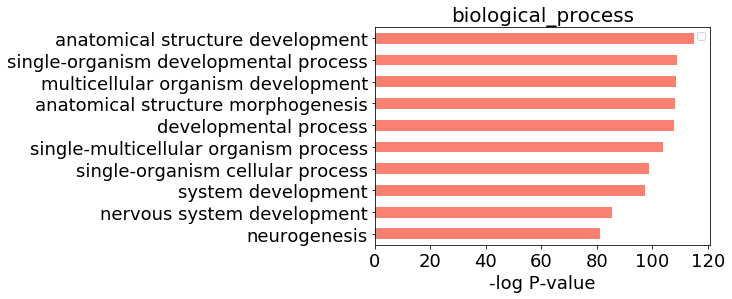

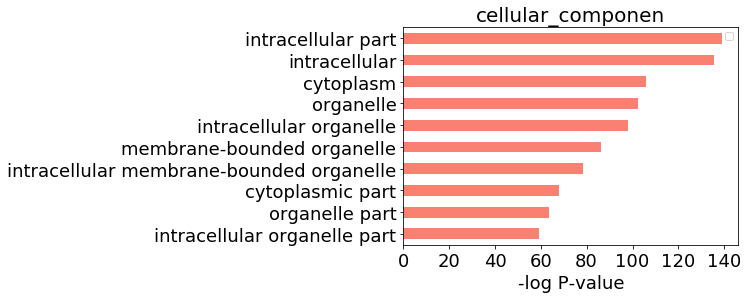

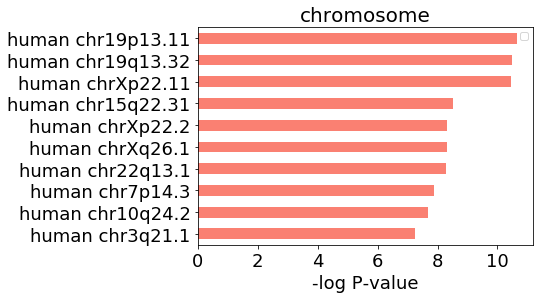

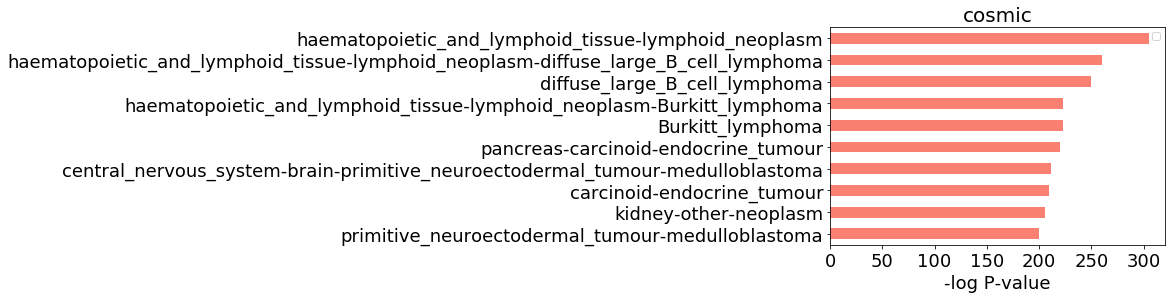

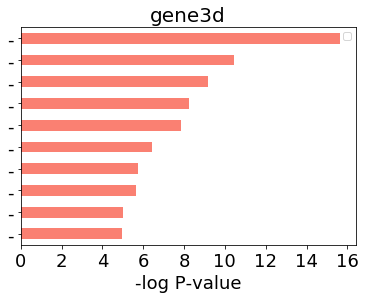

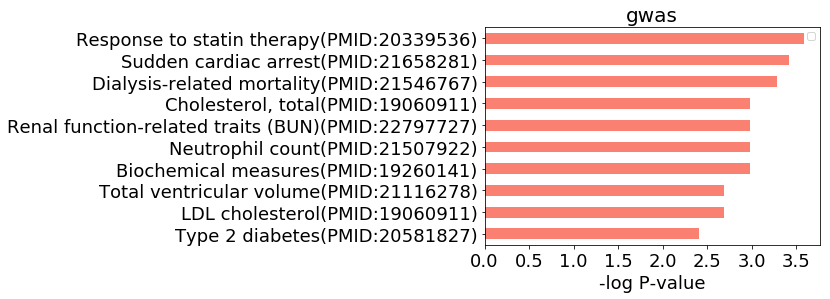

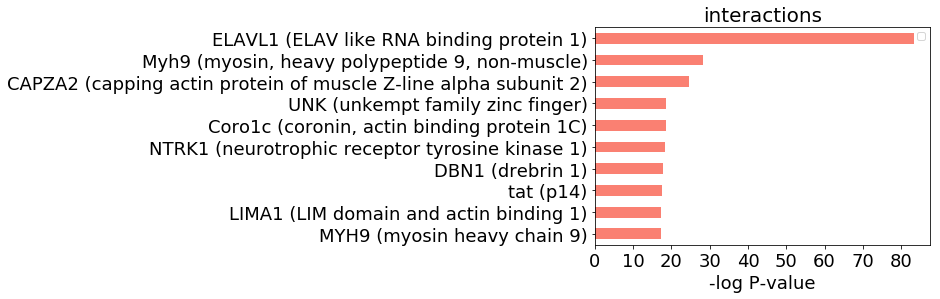

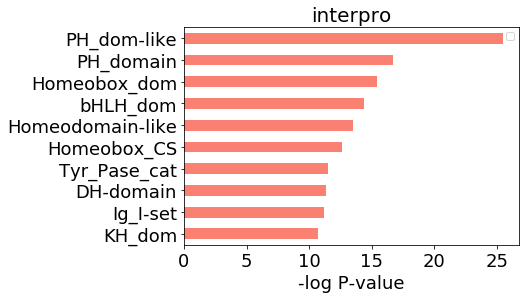

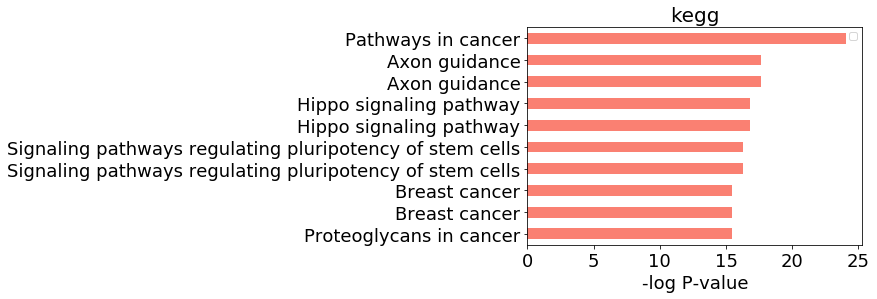

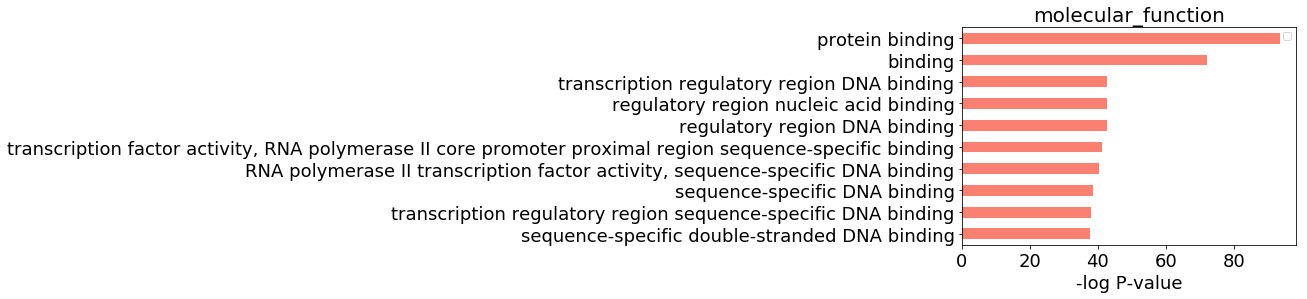

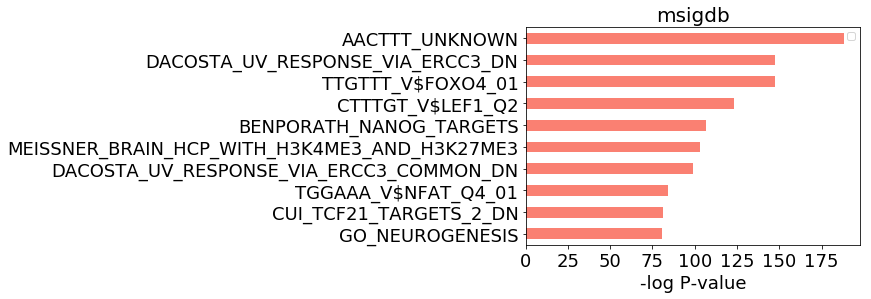

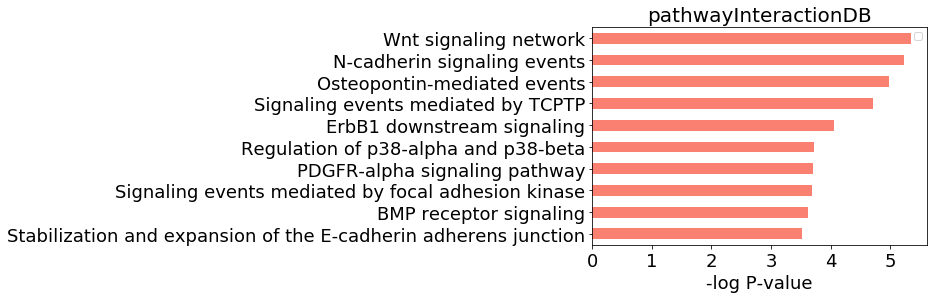

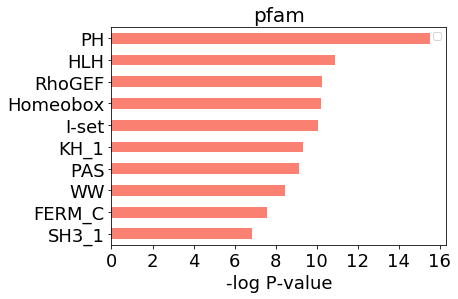

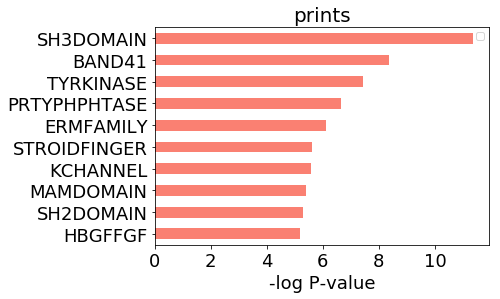

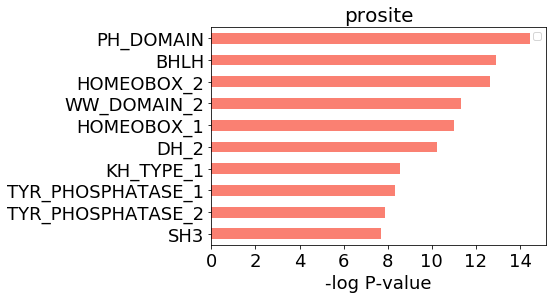

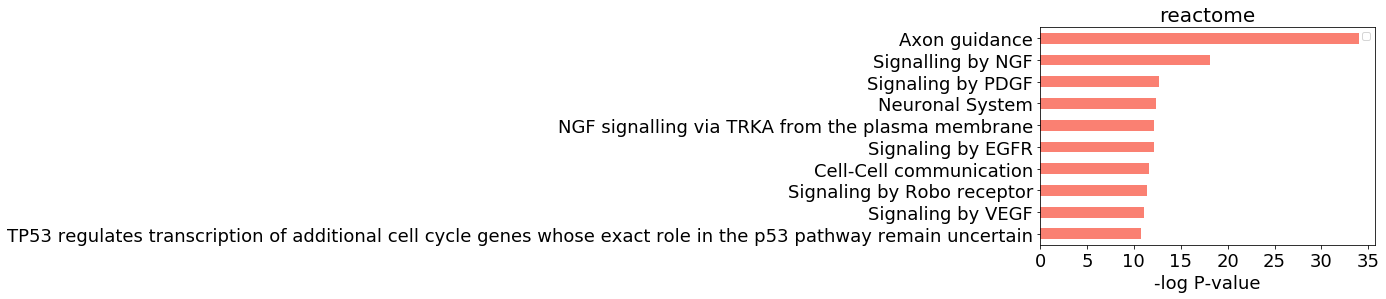

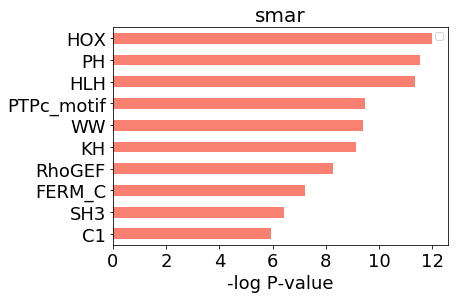

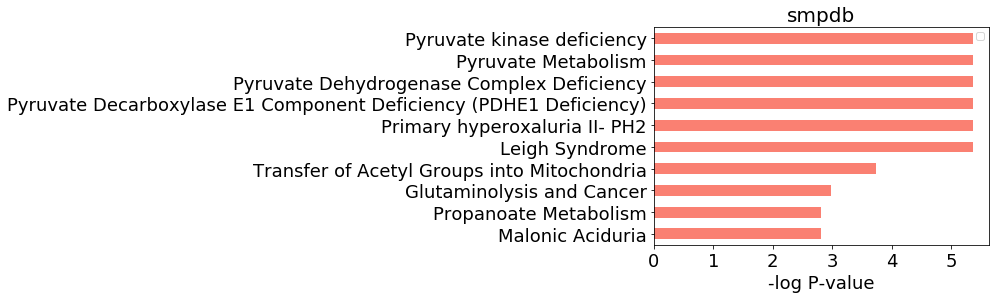

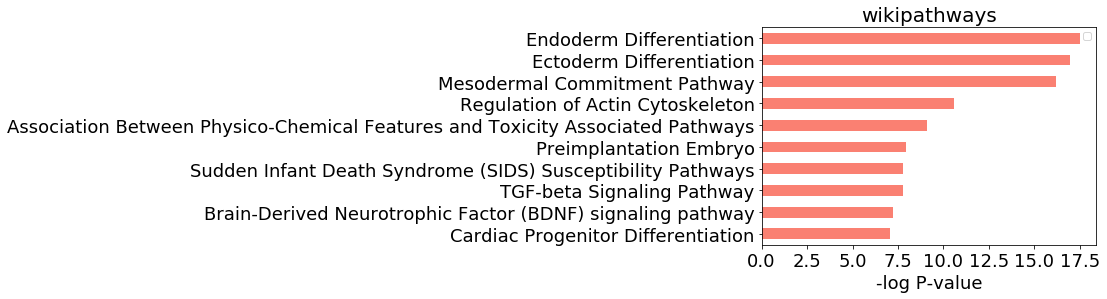

In [32]:
for go in nanog_go:
    _go = pd.read_table(go)
    title = go.split("/")[-1].strip(".txt")
    _go['logPnew'] = - _go.logP
    _plot = _go.head(10).sort_values('logPnew',ascending=True)
    try:
        bar = _plot.plot.barh(x='Term',y='logPnew', color='salmon',label="-logP", fontsize=18)
        bar.set_title( go.split("/")[-1].strip(".txt"), fontsize=20)
        bar.set_xlabel("-log P-value", fontsize=18)
        bar.set_ylabel("")
        bar.legend("")
        bar.figure.savefig(go.replace(".txt",".pdf"), bbox_inches='tight')
    except:
        pass

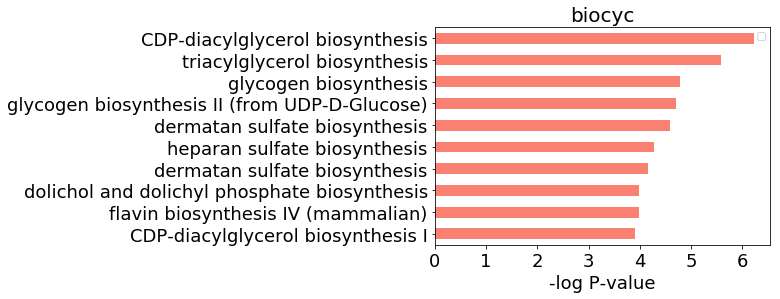

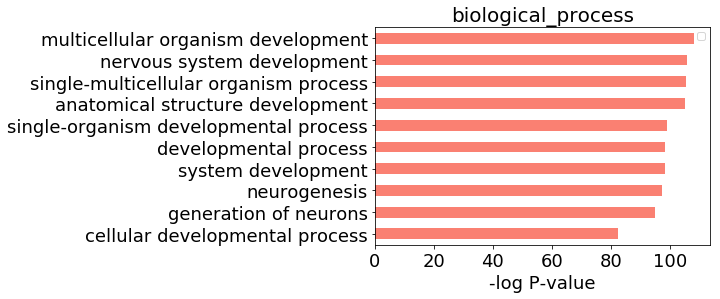

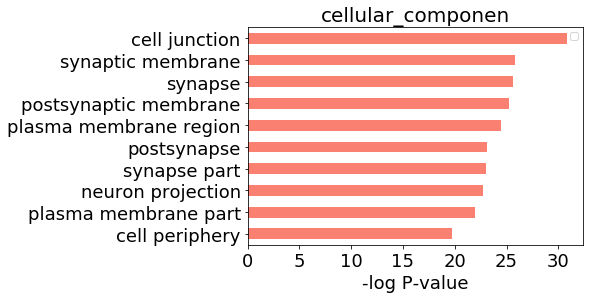

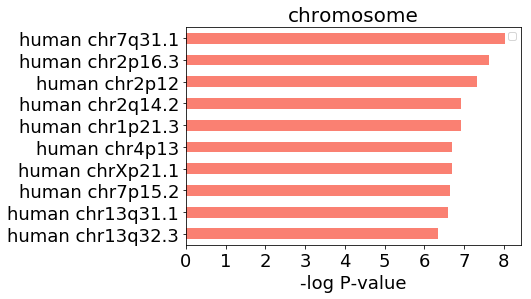

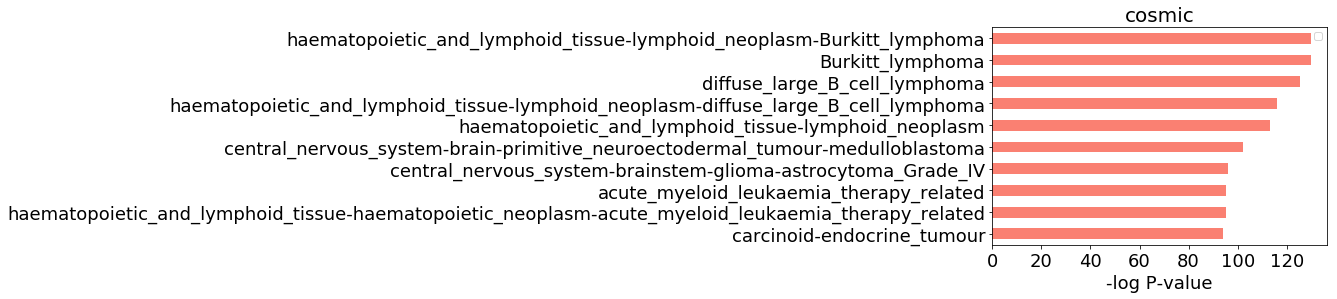

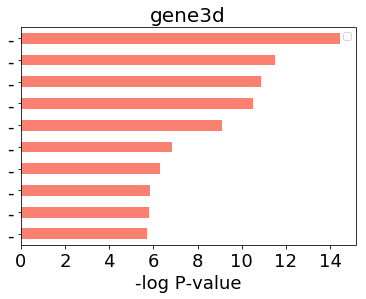

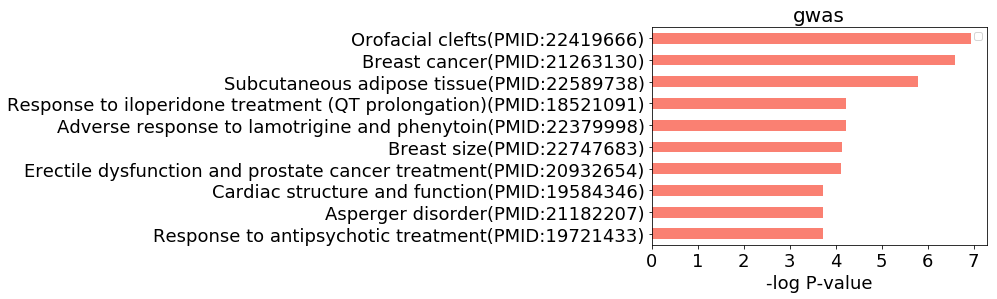

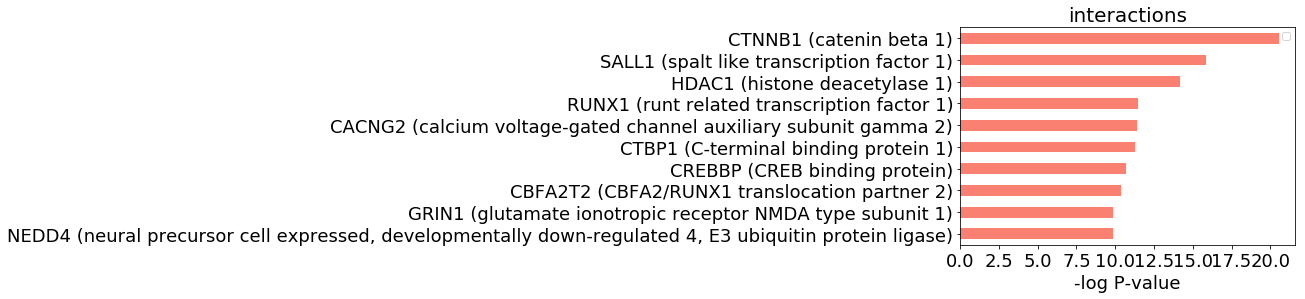

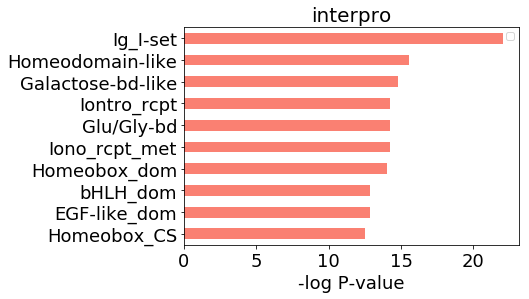

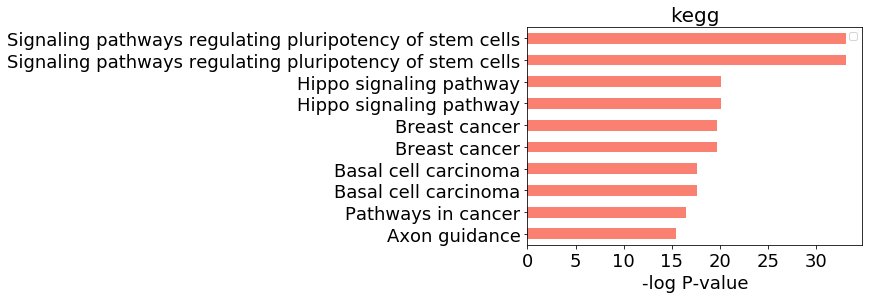

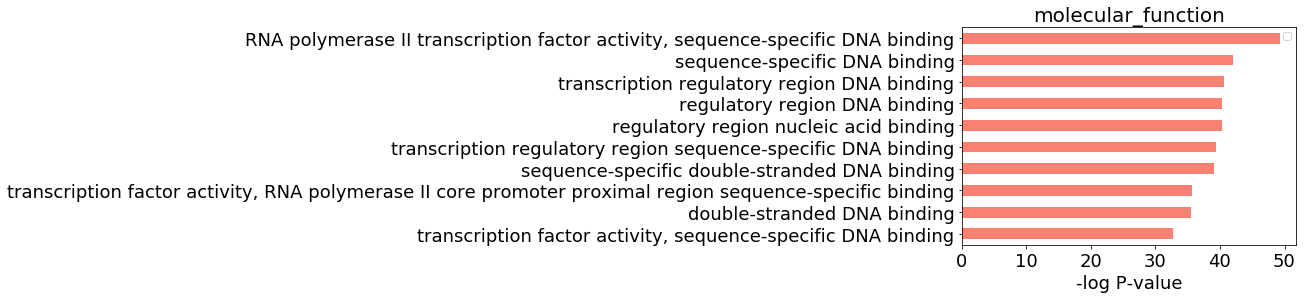

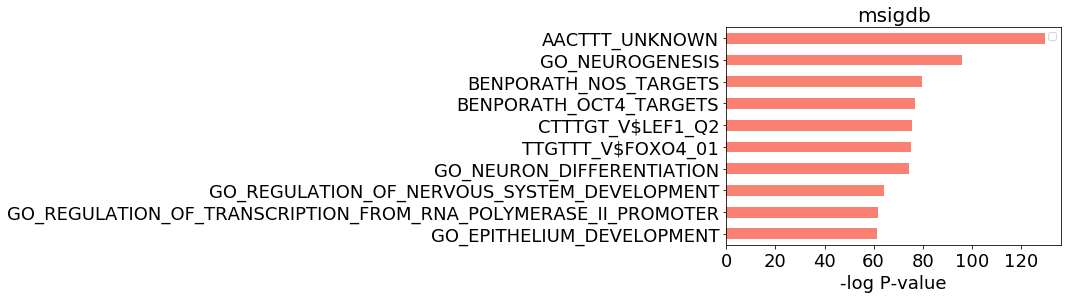

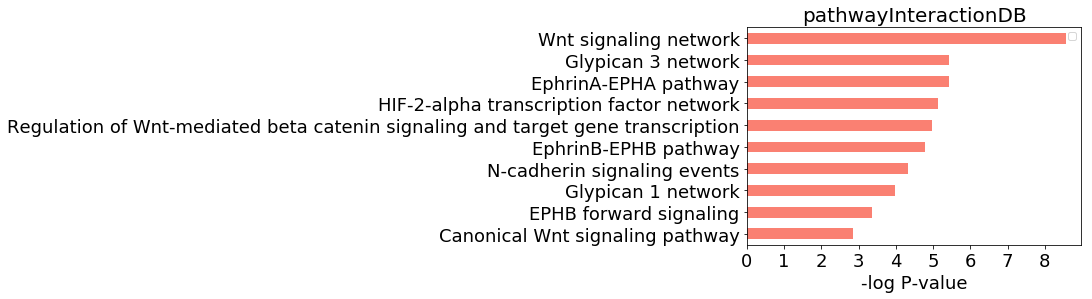

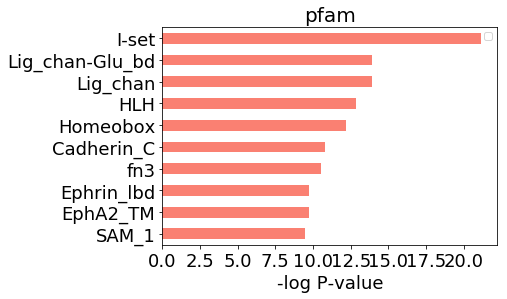

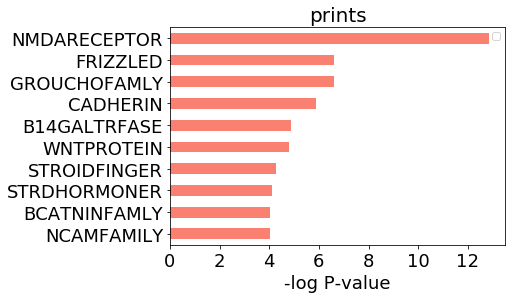

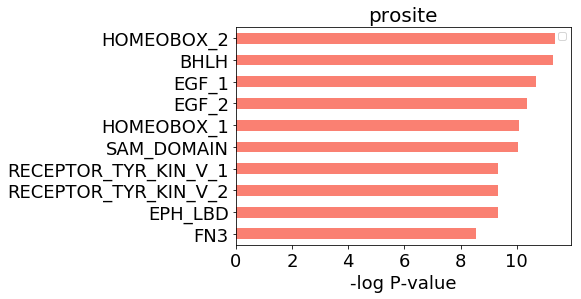

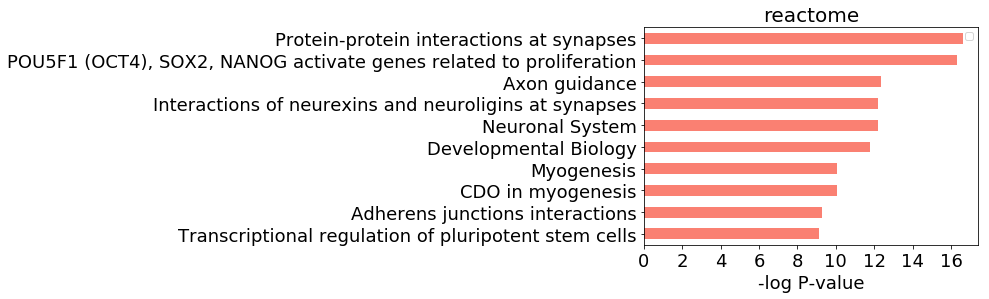

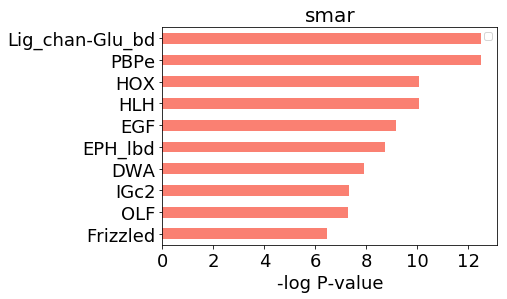

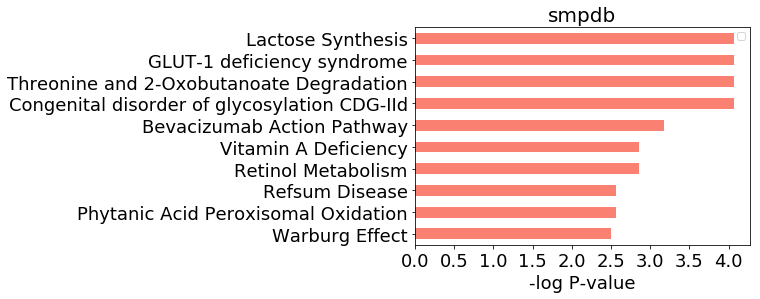

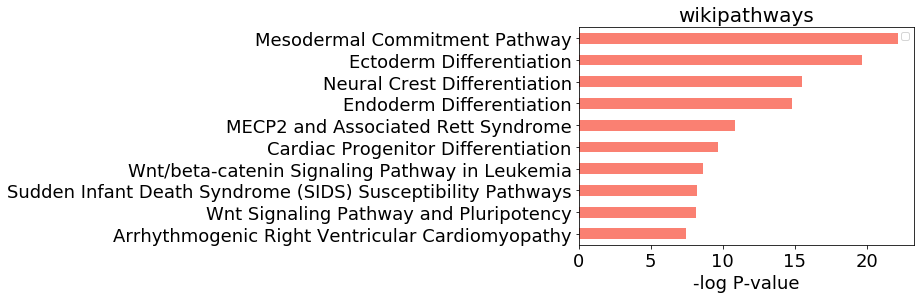

In [33]:
for go in oct4_go:
    _go = pd.read_table(go)
    title = go.split("/")[-1].strip(".txt")
    _go['logPnew'] = - _go.logP
    _plot = _go.head(10).sort_values('logPnew',ascending=True)
    try:
        bar = _plot.plot.barh(x='Term',y='logPnew', color='salmon',label="-logP", fontsize=18)
        bar.set_title( go.split("/")[-1].strip(".txt"), fontsize=20)
        bar.set_xlabel("-log P-value", fontsize=18)
        bar.set_ylabel("")
        bar.legend("")
        bar.figure.savefig(go.replace(".txt",".pdf"), bbox_inches='tight')
    except:
        pass

In [5]:
nanogSeq = pd.read_table("./NANOG_ChIP_peaks.fasta.txt",header=None)
nanogSeq.head()

,0,1,2,3,4,5,6,7,8,9,10
0,chr1,713896,714380,NANOG_ChIP_peak_1,184,.,6.65793,21.16345,18.47843,241,CAGCCGGCAACACACAGAACCTGGCGGGGAGGTCACTCTTACCAGT...
1,chr1,780977,781405,NANOG_ChIP_peak_2,67,.,4.90148,9.06794,6.70635,214,ACCAGAAAATTCACTTATTCTCATGAAAGTTTGTAATCTTTGGAGA...
2,chr1,840630,841156,NANOG_ChIP_peak_3,316,.,10.50740,34.54845,31.65686,257,ATAAACCCAGCCAGGcacatccactagaatggctgtgatttcagaa...
3,chr1,877070,877774,NANOG_ChIP_peak_4,560,.,15.84402,59.15140,56.00916,321,ACAGACCCGGGTTTCTCGGGTCCAGGACACGAGGCGGGGCGGGGCG...
4,chr1,1093395,1093886,NANOG_ChIP_peak_5,32,.,3.50457,5.33996,3.21392,241,CCCCGGTGGCCGAGGAGCCAGGAGCGGCTCCCGGGGCTGTGCGCGG...


In [8]:
seq = nanogSeq[[3,10]]
seq.columns = ['PeakID','PeakSequence']
seq.head()

,PeakID,PeakSequence
0,NANOG_ChIP_peak_1,CAGCCGGCAACACACAGAACCTGGCGGGGAGGTCACTCTTACCAGT...
1,NANOG_ChIP_peak_2,ACCAGAAAATTCACTTATTCTCATGAAAGTTTGTAATCTTTGGAGA...
2,NANOG_ChIP_peak_3,ATAAACCCAGCCAGGcacatccactagaatggctgtgatttcagaa...
3,NANOG_ChIP_peak_4,ACAGACCCGGGTTTCTCGGGTCCAGGACACGAGGCGGGGCGGGGCG...
4,NANOG_ChIP_peak_5,CCCCGGTGGCCGAGGAGCCAGGAGCGGCTCCCGGGGCTGTGCGCGG...


In [3]:
nanogPeaks = pd.read_table("./NANOG.peaksAnnotate.txt",index_col=0)
nanogPeaks.head()

,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
PeakID (cmd=annotatePeaks.pl ./macs_out_highQuality/NANOG_ChIP_peaks.narrowPeak hg19),,,,,,,,,,,,,,,,,,
NANOG_ChIP_peak_36819,chr4,130946522,130948315,+,10130,NaN,Intergenic,Intergenic,-254785.0,NR_110753,101927282.0,Hs.407480,NR_110753,ENSG00000246876,LOC101927282,-,uncharacterized LOC101927282,ncRNA
NANOG_ChIP_peak_42536a,chr6,31139391,31141256,+,9524,NaN,Intergenic,Intergenic,-1853.0,NM_002701,5460.0,Hs.249184,NM_002701,ENSG00000204531,POU5F1,OCT3|OCT4|OTF-3|OTF3|OTF4|Oct-3|Oct-4,POU class 5 homeobox 1,protein-coding
NANOG_ChIP_peak_48767,chr8,9121307,9122501,+,9060,NaN,Intergenic,Intergenic,-60657.0,NR_040039,157273.0,Hs.650222,NR_040039,ENSG00000254235,LOC157273,-,uncharacterized LOC157273,ncRNA
NANOG_ChIP_peak_55844,chrX,128224549,128225928,+,8772,NaN,Intergenic,Intergenic,432244.0,NM_003069,6594.0,Hs.152292,NM_003069,ENSG00000102038,SMARCA1,ISWI|NURF140|SNF2L|SNF2L1|SNF2LB|SNF2LT|SWI|SW...,"SWI/SNF related, matrix associated, actin depe...",protein-coding
NANOG_ChIP_peak_46180,chr7,31505321,31506391,+,8479,NaN,Intergenic,Intergenic,-47829.0,NM_001257967,223075.0,Hs.224269,NM_194300,ENSG00000180347,CCDC129,-,coiled-coil domain containing 129,protein-coding


In [14]:
nanog_merg = pd.merge(nanogPeaks, seq, left_index=True, right_on='PeakID',how='left')

In [15]:
nanog_merg.shape

(59660, 20)

In [16]:
seq.shape

(59630, 2)

In [17]:
nanogPeaks.shape

(59660, 18)

In [18]:
nanog_merg.to_csv("./NANOG.peaksAnnotate.full.txt",sep="\t")

In [27]:
nanogSeq = pd.read_table("./NANOG_ChIP_peaks.fasta.txt",header=None)
seq = nanogSeq[[3,10]]
seq.columns = ['PeakID','PeakSequence']
nanogPeaks = pd.read_table("./NANOG.peaksAnnotate.txt",index_col=0)
nanog_merg = nanogPeaks.merge(right=seq, left_index=True, right_on='PeakID',how='left')
nanog_merg.set_index('PeakID',inplace=True)
nanog_merg.to_csv("./NANOG.peaksAnnotate.full.txt",sep="\t")

In [28]:
nanog_merg.head()

,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,PeakSequence
PeakID,,,,,,,,,,,,,,,,,,,
NANOG_ChIP_peak_36819,chr4,130946522,130948315,+,10130,NaN,Intergenic,Intergenic,-254785.0,NR_110753,101927282.0,Hs.407480,NR_110753,ENSG00000246876,LOC101927282,-,uncharacterized LOC101927282,ncRNA,GCACCAATCATGAGCTTCATGGTTGTAACATTGGGTACACATTATT...
NANOG_ChIP_peak_42536a,chr6,31139391,31141256,+,9524,NaN,Intergenic,Intergenic,-1853.0,NM_002701,5460.0,Hs.249184,NM_002701,ENSG00000204531,POU5F1,OCT3|OCT4|OTF-3|OTF3|OTF4|Oct-3|Oct-4,POU class 5 homeobox 1,protein-coding,ACCCCTCCGTCTTCCAGAATCAGACTCCAGACTCTCCTCATCTAAC...
NANOG_ChIP_peak_48767,chr8,9121307,9122501,+,9060,NaN,Intergenic,Intergenic,-60657.0,NR_040039,157273.0,Hs.650222,NR_040039,ENSG00000254235,LOC157273,-,uncharacterized LOC157273,ncRNA,TTCTGACCTCCTTTAGAGATCCCTAAATTTGCCAGAGTAGGTATTC...
NANOG_ChIP_peak_55844,chrX,128224549,128225928,+,8772,NaN,Intergenic,Intergenic,432244.0,NM_003069,6594.0,Hs.152292,NM_003069,ENSG00000102038,SMARCA1,ISWI|NURF140|SNF2L|SNF2L1|SNF2LB|SNF2LT|SWI|SW...,"SWI/SNF related, matrix associated, actin depe...",protein-coding,CTTATACACTCTTTGGACTCCAGTAGAGTTATGTAAAATTTCCCTT...
NANOG_ChIP_peak_46180,chr7,31505321,31506391,+,8479,NaN,Intergenic,Intergenic,-47829.0,NM_001257967,223075.0,Hs.224269,NM_194300,ENSG00000180347,CCDC129,-,coiled-coil domain containing 129,protein-coding,AAAATCTGTTTTGTTGCTTATCAGCCCAggcaagctgatgaacatc...


In [29]:
nanogPeaks.head()

,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
PeakID (cmd=annotatePeaks.pl ./macs_out_highQuality/NANOG_ChIP_peaks.narrowPeak hg19),,,,,,,,,,,,,,,,,,
NANOG_ChIP_peak_36819,chr4,130946522,130948315,+,10130,NaN,Intergenic,Intergenic,-254785.0,NR_110753,101927282.0,Hs.407480,NR_110753,ENSG00000246876,LOC101927282,-,uncharacterized LOC101927282,ncRNA
NANOG_ChIP_peak_42536a,chr6,31139391,31141256,+,9524,NaN,Intergenic,Intergenic,-1853.0,NM_002701,5460.0,Hs.249184,NM_002701,ENSG00000204531,POU5F1,OCT3|OCT4|OTF-3|OTF3|OTF4|Oct-3|Oct-4,POU class 5 homeobox 1,protein-coding
NANOG_ChIP_peak_48767,chr8,9121307,9122501,+,9060,NaN,Intergenic,Intergenic,-60657.0,NR_040039,157273.0,Hs.650222,NR_040039,ENSG00000254235,LOC157273,-,uncharacterized LOC157273,ncRNA
NANOG_ChIP_peak_55844,chrX,128224549,128225928,+,8772,NaN,Intergenic,Intergenic,432244.0,NM_003069,6594.0,Hs.152292,NM_003069,ENSG00000102038,SMARCA1,ISWI|NURF140|SNF2L|SNF2L1|SNF2LB|SNF2LT|SWI|SW...,"SWI/SNF related, matrix associated, actin depe...",protein-coding
NANOG_ChIP_peak_46180,chr7,31505321,31506391,+,8479,NaN,Intergenic,Intergenic,-47829.0,NM_001257967,223075.0,Hs.224269,NM_194300,ENSG00000180347,CCDC129,-,coiled-coil domain containing 129,protein-coding


In [4]:
nanogPeaks.Annotation.value_counts()

Intergenic                                25320
intron (NM_001286838, intron 1 of 14)        32
intron (NM_001204963, intron 2 of 8)         25
intron (NM_015520, intron 1 of 24)           24
intron (NM_001282924, intron 3 of 3)         23
intron (NM_002841, intron 1 of 29)           22
intron (NM_194449, intron 1 of 16)           21
intron (NM_001123384, intron 1 of 13)        21
intron (NM_004746, intron 1 of 12)           20
intron (NM_206808, intron 1 of 8)            20
intron (NM_024766, intron 3 of 10)           20
intron (NM_001012393, intron 1 of 7)         20
intron (NR_135237, intron 7 of 10)           19
intron (NM_001291997, intron 7 of 7)         19
intron (NM_015570, intron 1 of 18)           19
intron (NR_015410, intron 2 of 11)           19
intron (NM_001083592, intron 1 of 6)         19
intron (NM_001321809, intron 7 of 11)        18
intron (NM_033290, intron 1 of 9)            18
intron (NM_005708, intron 1 of 8)            18
intron (NM_001317940, intron 2 of 5)    